<font color=blue>__Text Generator Model with LSTM Recurrent Neural Network__</font>

In this Project firstly we try to develop a Word-Level Neural Network model and used it to Generate the text where it will work by predicting the probability of the occurence of the next word in the sequence which will be based upon the word which has already been observed in the sequence. 

Thereafter we will push our understanding to further develop a text generator with LSTM Recurrent Neural Network with the help of Keras, as Recurrent Neural Networks are generally used for the generative models but other than that they can be used as a predictive model which can learn the sequence of the problem and hence entirely generate new sequences.

Generative models are used to study the effectiveness of the model which has learned the problem and  also are helpful in learning more about the problem domain.

In this project we will further try to create a generative model for the text, which will be done character by character by using LSTM recurrent neural network with Keras




<font color=blue>__Developing a Word-Level Neural Language Model and using it to Genrate Text__</font>

Neural networks are generally preferred in the development of the statistical language models as they can utilise a distributed representation where different words with similar meanings have similar representation and apart from that they can also use a larger context of recently observed words in making the predictions.

These 3 goals and learnings were primarily have been achieved after implementing the first part of our project-
- How to prepare text for developing a word-based language model.
- How to design and fit a neural language model with a learned embedding and an LSTM hidden layer.
- How to use the learned language model to generate new text with similar statistical properties as the source text.

__Installing and Importing the necessary Packages required for the model to work properly__

In [122]:
#adding neccessary packages


import pandas as pd
import string

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from matplotlib import pyplot as plt
%matplotlib inline



from numpy import array
from pickle import dump

from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences

from keras.layers import LSTM
from keras.layers import Embedding


from keras.models import load_model


from random import randint
from pickle import load


<font color=blue>__Data Preparation__</font>

This is the first and one of the most important part of the model as if the data is modelled and prepared properly, then the desired models can be applied on the data to predict and give the expected output.

<font color=blue>__Reviewing the Text__</font>

Firstly in the Data Preparation step reviewing the text in order to get an understanding what all steps have to be applied on the data such that it can be modelled properly.

For Example, this is the small part of the data from the text-:

<font color=red>Mr. Utterson the lawyer was a man of a rugged countenance that was
never lighted by a smile; cold, scanty and embarrassed in discourse;
backward in sentiment; lean, long, dusty, dreary and yet somehow
lovable. At friendly meetings, and when the wine was to his taste,
something eminently human beaconed from his eye; something indeed which
never found its way into his talk, but which spoke not only in these
silent symbols of the after-dinner face, but more often and loudly in
the acts of his life. He was austere with himself; drank gin when he
was alone, to mortify a taste for vintages; and though he enjoyed the
theatre, had not crossed the doors of one for twenty years. But he had
an approved tolerance for others; sometimes wondering, almost with
envy, at the high pressure of spirits involved in their misdeeds; and
in any extremity inclined to help rather than to reprove. “I incline to
Cain’s heresy,” he used to say quaintly: “I let my brother go to the
devil in his own way.” In this character, it was frequently his fortune
to be the last reputable acquaintance and the last good influence in
the lives of downgoing men. And to such as these, so long as they came
about his chambers, he never marked a shade of change in his demeanour.</font>

.....


So observing the Data and understanding what all things have to be handled in order to prepare the data

Here is a list of couple of things which were observed-

- Book/Chapter headings (e.g. “Chapter I.”).
- British/U.S English spelling (e.g. “honoured”)
- Lots of punctuation (e.g. “–“, “;–“, “?–“, and more)
- Strange names (e.g. “Utterson”).
- Some long monologues that go on for hundreds of lines.
- Some quoted dialog (e.g. ‘…’, "...")

These observations give us a better understanding to prepare and model our data accordingly.



<font color=blue>__Language Model Design__</font>

The Language model will be statistical and will help in predicting the probability of all the words where the input sequence of the text is given and in turn the predicted word thus obtained will be used to predict the next word.

We will try to process the data in a way such that the model ends up in dealing with the self-contained sentences and truncate the text wherever required to meet the different requirements.

So once we have the model design we will try to look to transform the raw text file into the sequence of 50 input words to 1 output word which will be fitted to the model

<font color=blue>__Loading the Text__</font>

First step in the Data Processsing is to load the text into memory, where a filename it given and it returns the sequences of the loaded text

In [123]:
# creating a fucntion to import data from a text file--
# opening the file as read only and then reading the text


def load_file(filename):
    
    file = open(filename, 'r')                       
 
    text = file.read()

    file.close()
    
    return text
 

<font color=blue>__Cleaning the Text__</font>


Now we will try to transform the text file which we have loaded in the system to produce the sequences of tokens or words and use them as a source to train our model.

As the text analysis was performed in the above step, keeping that in mind we will now perform the specific operations to clean the text

- Replace ‘–‘ with a white space so we can split words better.
- Split words based on white space.
- Remove all punctuation from words to reduce the vocabulary size (e.g. ‘What?’ becomes ‘What’).
- Remove all words that are not alphabetic to remove standalone punctuation tokens.
- Normalize all words to lowercase to reduce the vocabulary size.

In [124]:
# turn contents into clean tokens by removing unwanted punctuations and non-alphabet characters
# all text is then returned as a small case text with only alphabets.

def clean_file(text_file):

    text_file = text_file.replace('--', ' ')
    
    tokens = text_file.split()
   
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    
    tokens = [word for word in tokens if word.isalpha()]
   
    tokens = [word.lower() for word in tokens]
    
    return tokens


In [125]:
# save the cleaned text and tokens to file, one dialog per line


def save_file(lines, filename):
    
    data = '\n'.join(lines)
    file = open(filename, 'w')
    
    file.write(data)
    file.close()


In [126]:
# using the function to load training document
text_file = load_file('JekyllHyde.txt')
print(text_file[250:839])

NDOW

 THE LAST NIGHT

 DR. LANYON’S NARRATIVE

 HENRY JEKYLL’S FULL STATEMENT OF THE CASE
 

STORY OF THE DOOR

Mr. Utterson the lawyer was a man of a rugged countenance that was
never lighted by a smile; cold, scanty and embarrassed in discourse;
backward in sentiment; lean, long, dusty, dreary and yet somehow
lovable. At friendly meetings, and when the wine was to his taste,
something eminently human beaconed from his eye; something indeed which
never found its way into his talk, but which spoke not only in these
silent symbols of the after-dinner face, but more often and loudly 


In [127]:
# Cleaning the  file tokens and printing the unique tokens

tokens = clean_file(text_file)
print(tokens[:100])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

['the', 'strange', 'case', 'of', 'dr', 'jekyll', 'and', 'mr', 'hyde', 'by', 'robert', 'louis', 'stevenson', 'contents', 'story', 'of', 'the', 'door', 'search', 'for', 'mr', 'hyde', 'dr', 'jekyll', 'was', 'quite', 'at', 'ease', 'the', 'carew', 'murder', 'case', 'incident', 'of', 'the', 'letter', 'incident', 'of', 'dr', 'lanyon', 'incident', 'at', 'the', 'window', 'the', 'last', 'night', 'dr', 'narrative', 'henry', 'full', 'statement', 'of', 'the', 'case', 'story', 'of', 'the', 'door', 'mr', 'utterson', 'the', 'lawyer', 'was', 'a', 'man', 'of', 'a', 'rugged', 'countenance', 'that', 'was', 'never', 'lighted', 'by', 'a', 'smile', 'cold', 'scanty', 'and', 'embarrassed', 'in', 'discourse', 'backward', 'in', 'sentiment', 'lean', 'long', 'dusty', 'dreary', 'and', 'yet', 'somehow', 'lovable', 'at', 'friendly', 'meetings', 'and', 'when', 'the']
Total Tokens: 24550
Unique Tokens: 3871


In [128]:
# organize into sequences of tokens by selecting the  sequence of tokens. Converting and storing them as lines

length = 50 + 1
sequences = list()
for i in range(length, len(tokens)):
    
    seq = tokens[i-length:i]
    
    line = ' '.join(seq)
   
    sequences.append(line)
    
print('Total Sequences: %d' % len(sequences))

Total Sequences: 24499


In [129]:
# save  the sequences to file

out_filename = 'JekyllHyde_sequences.txt'
save_file(sequences, out_filename)

<font color=blue>Training The Language Model</font>

Training the statistical language model from the data which we prepared.

The model is a neural language model and has some particularly unique features-
- It uses a distributed representation for words so that different words with similar meanings will have a similar representation.
- It learns the representation at the same time as learning the model.
- It learns to predict the probability for the next word using the context of the last 100 words.

__Mainly we are using an Embedding Layer in order to learn the representation of the words and LSTM network to learn the predicted words which will be based upon the context__.


In [130]:
#Loading the sequence file which was generated in the last step
text_file = load_file('JekyllHyde_sequences.txt')
lines = text_file.split('\n')

<font color=blue>__Encode Sequences__</font>

The embedded layer discussed expects the input or input sequences to be comprised of the various integers.

Here we map each word of our data to a unique integer and encode our input sequences and later when we will be making the predictions we will convert the predicted values to numbers and in-turn find the word associated in the map.

__For this we will use the Tokenizer class from the Keras API__

A tokenizer is being trained on the full dataset and it finds the unique word in the data and assign each word a unique integer value.

And then encoding of all the training sequences will be performed by the fit Tokenizer command which will convert each sequence from the list of the words to the list of the integers.

In [131]:
# integer encode sequences of words using tokenizer, then creating a vocabulary size

tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

vocab_size = len(tokenizer.word_index) + 1

In [132]:
# # After encoding the input sequences we will now try to separate into input and output elements
## Separating the Values with the array slicing
sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]

<font color=blue>__Fitting the Model__</font>

We will now fit our Language Model on the training data.

We have use the value of 50 here as the size of the embedding vector space, which is used th know the size of the vocabulary and the length of the input sequences.

__Also we are using 2 hidden LSTM layers which has 100 memory cells each, we can achieve more better results by more memory and deeper network.__

Softmax activation function is used such that the outputs have the characteristics of the probabilites which are normalized.

In [133]:
#Creating a RNN model using Long-short term memory
#Adding layes to the model using Rectified Linear Unit and Softmax, as there are multiclases

model = Sequential()
model.add(Embedding(vocab_size, 50, input_length = seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())


# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Fitting the model using batches and for 100epochs
model.fit(X, y, batch_size=128, epochs=100)
 
# save the model to file
model.save('model.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 50)            193600    
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 100)           60400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 3872)              391072    
Total params: 735,572
Trainable params: 735,572
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
24499/24499 [==============================] - 41s 2ms/step - loss: 6.6255 - acc: 0.0625
Epoch 2/100
24499/24499 [=====

In [134]:
# save the model to file
model.save('JekyllHyde_model.h5')
# save the tokenizer
dump(tokenizer, open('JekyllHyde_tokenizer.pkl', 'wb'))

<font color=blue>__Using the Language Model__</font>

Once we have trained the language model now we are ready for using the model.
Here we use it to generate new sequences of the text which have the same statistical properties as the source text.

In [135]:
# using load_model from keras we load the saved model


seq_length = len(lines[0].split()) - 1

#load the model
model = load_model('JekyllHyde_model.h5')

tokenizer = load(open('JekyllHyde_tokenizer.pkl', 'rb'))

In [136]:
# We then create a language model using the sequences and generate new text by selecting random sequences  

# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text
    
    # generate a fixed number of words
    for _ in range(n_words):
        
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
        
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
                
        # append to input
        in_text += ' ' + out_word
        result.append(out_word)
    return ' '.join(result)

Now the final output will be generated of our model which is new and unique text will be generated.

<font color=green>The first output paragraph is the printed seed text</font>

<font color=green>Then the 50 words of the generated text are printed</font>

In [137]:
# load cleaned text sequences

text_file = load_file('JekyllHyde_sequences.txt')
lines = text_file.split('\n')
seq_length = len(lines[0].split()) - 1
 
# load the model
model = load_model('JekyllHyde_model.h5')
 
# load the tokenizer
tokenizer = load(open('JekyllHyde_tokenizer.pkl', 'rb'))
 
# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')
 
# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated[:])

it almost rivalled the brightness of hope i was stepping leisurely across the court after breakfast drinking the chill of the air with pleasure when i was seized again with those indescribable sensations that heralded the change and i had but the time to gain the shelter of my cabinet before

two ahead now anatomical was long overthrown the screaming and obligation at least fumes of smiling and to be forced and you are not see it was a fine clear to the lawyer have been learning his clasped room i had come up with a tempest and the whole business


<font color=blue>__Plotting the Word Frequency__</font>

In order to better understand the data the word frequency is plotted and which shows that the unique sequences of the words in the text has been generated.

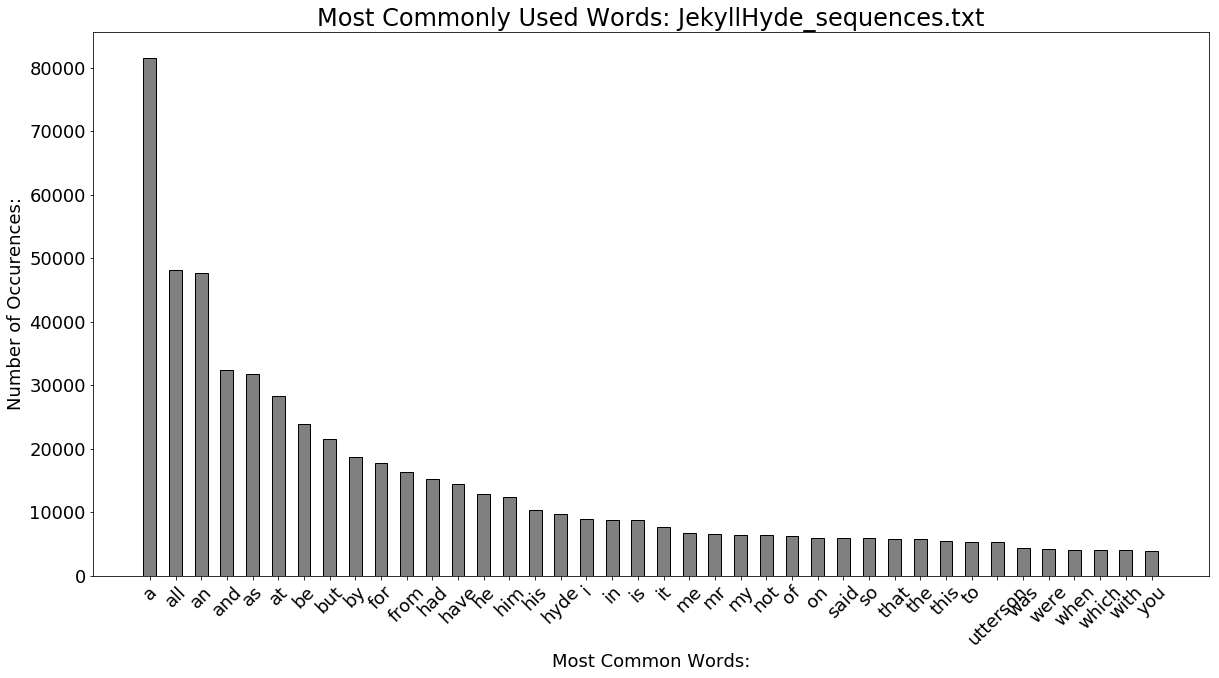

In [138]:

def plotWordFrequency(file):
    f = open(file,'r')
    words = [x for y in [l.split() for l in f.readlines()] for x in y]
    data = sorted([(w, words.count(w)) for w in set(words)], key = lambda x:x[1], reverse=True)[:40] 
    most_words = [x[0] for x in data]
    times_used = [int(x[1]) for x in data]
    plt.figure(figsize=(20,10))
    plt.bar(x=sorted(most_words), height=times_used, color = 'grey', edgecolor = 'black',  width=.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(rotation=0, fontsize=18)
    plt.xlabel('Most Common Words:', fontsize=18)
    plt.ylabel('Number of Occurences:', fontsize=18)
    plt.title('Most Commonly Used Words: %s' % (file), fontsize=24)
    plt.show()
    
    
    
file = 'JekyllHyde_sequences.txt'
plotWordFrequency(file)

<font color=green>__Developing a Small LSTM Recurrent Neural Network__</font>

In this part of our project we will focuss primarily on LSTM recurrent neural network to improve the performance and the quality of the text generation, here we will use another text dataset to perform the text generation operation.

So firstly Small LSTM Recurrent Neural Network is designed then later a Large LSTM Recurrent Neural Network is designed which will significantly improve the performance of the model

In [5]:

#Installing and importing the required libraries
import sys
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import matplotlib.pyplot as plt





In [52]:
#Loading the file into the system
filename = "secret_advisory.txt"
raw_text = open(filename).read()
raw_text = raw_text.lower()

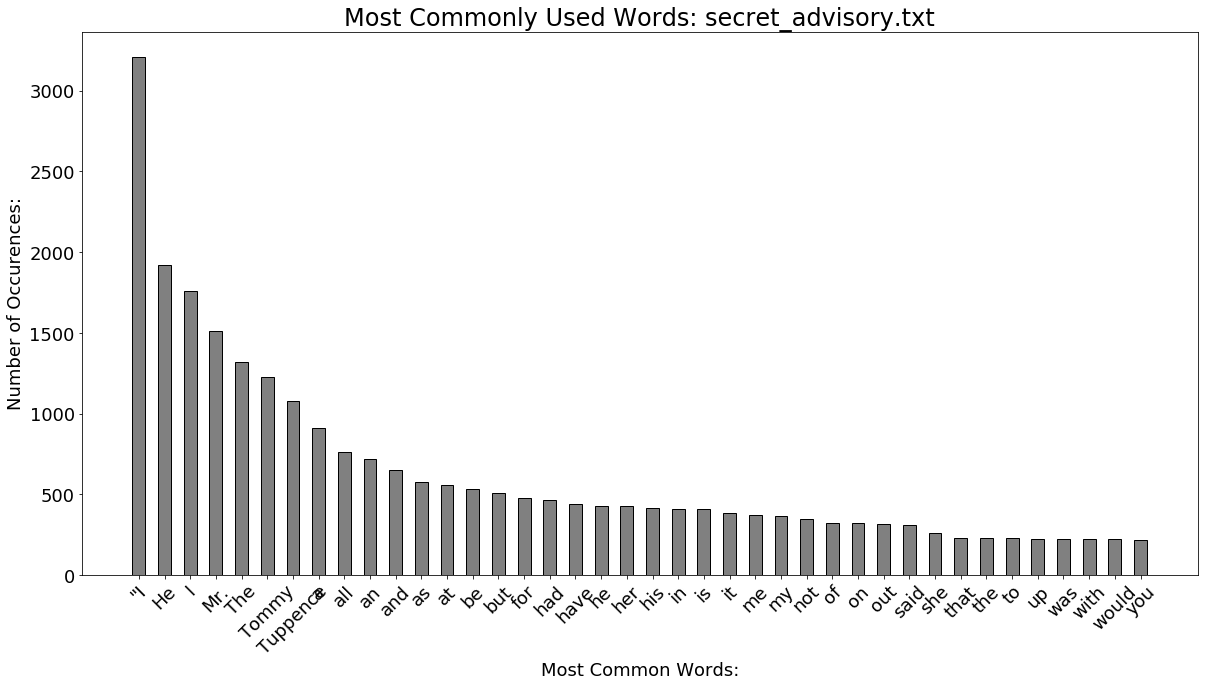

In [71]:
#Plotting the Word Frequency

##In order to better understand the data the word frequency is plotted
import matplotlib
def plotWordFrequency(file):
    f = open(file,'r')
    words = [x for y in [l.split() for l in f.readlines()] for x in y]
    data = sorted([(w, words.count(w)) for w in set(words)], key = lambda x:x[1], reverse=True)[:40] 
    most_words = [x[0] for x in data]
    times_used = [int(x[1]) for x in data]
    plt.figure(figsize=(20,10))
    plt.bar(x=sorted(most_words), height=times_used, color = 'grey', edgecolor = 'black',  width=.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(rotation=0, fontsize=18)
    plt.xlabel('Most Common Words:', fontsize=18)
    plt.ylabel('Number of Occurences:', fontsize=18)
    plt.title('Most Commonly Used Words: %s' % (file), fontsize=24)
    plt.show()
    
    
    
file = 'secret_advisory.txt'
plotWordFrequency(file)

In [79]:

# create mapping of unique characters to the integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))


# preparing the dataset of input to output pairs which are encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)


Total Characters:  424971
Total Vocab:  49
Total Patterns:  424871


In [54]:
# reshaping X in the form of [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalizing the X matrix
X = X / float(n_vocab)
# one hot encoding the output variable
y = np_utils.to_categorical(dataY)

- __In this step we will define our LSTM model where a single hidden LSTM layer is defined with 256 memory units, also the output layer will be dense by usage of softmax activation function such that output probability prediction is made of the 47 characters between 0 and 1__

    Also it is to be noted that the entire dataset which we have is modelled to learn the probability of each       character in the sequence.

    This model will basically try to predict each character observed in the training dataset perfectly, so we are not mainly interested in the classification accuracy of our model but rather we are focussed on the generalisation of the dataset which in-turn will minimize the loss function.
   So here our model tries to get a perfect trade-off of overfitting and the generalization.


- __Also, as the network is very slow to train and due to our requirements of the optimization of our model we are trying to use model checkpoints to record all the number of weights in order to file each time an improvement in the loss is observed at the end of epoch.__
  So the model is fitted to the data with a decent number of 10 epochs

In [70]:
# summarizing the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab : ", n_vocab)
print ("Total Patterns: ", n_patterns)
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# fit the model
model.fit(X, y, epochs=10, batch_size=128, callbacks=callbacks_list)

Total Characters:  424971
Total Vocab:  49
Total Patterns:  424871
Epoch 1/10
424871/424871 [==============================] - 629s 1ms/step - loss: 2.8798

Epoch 00001: loss improved from inf to 2.87977, saving model to weights-improvement-01-2.8798.hdf5
Epoch 2/10
424871/424871 [==============================] - 628s 1ms/step - loss: 2.6902

Epoch 00002: loss improved from 2.87977 to 2.69022, saving model to weights-improvement-02-2.6902.hdf5
Epoch 3/10
424871/424871 [==============================] - 631s 1ms/step - loss: 2.5705

Epoch 00003: loss improved from 2.69022 to 2.57052, saving model to weights-improvement-03-2.5705.hdf5
Epoch 4/10
424871/424871 [==============================] - 626s 1ms/step - loss: 2.4808

Epoch 00004: loss improved from 2.57052 to 2.48084, saving model to weights-improvement-04-2.4808.hdf5
Epoch 5/10
424871/424871 [==============================] - 628s 1ms/step - loss: 2.4111

Epoch 00005: loss improved from 2.48084 to 2.41106, saving model to weights

__After obtaining the 10 epochs we had 10 number of weight checkpoint files and after checking from above epoch generation we selected the weight with the minimum loss and the data will be loaded from the network weight checkpoint file and the network also need not be trained__

In [ ]:
# loading the network weights with the minimum loss obtained after running the epochs
filename = "weights-improvement-10-2.1817.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

__Now we will make the predictions with our model, also before generating the predicted values we firstly prepare the mapping of unique characters to the integers and will also create a reverse mapping which we will be using to convert integers back to characters.__

Also, in order to use the LSTM model with Keras we start our prediction by seed sequence of the input and then we will generate the next character and in turn will update the seed sequence in order to add the generated character in the end and thereafter trimming off the first character.

The above process is simulated till the time we want to predict the new characters which in this case we have used 1000 character in length.

In [76]:

#Creating the reverse mapping
int_to_char = dict((i, c) for i, c in enumerate(chars))
# picking up a random seed
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print ("Seed:")
print ("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generating the characters
for i in range(1000):
    x = numpy.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print ("\nDone.")

Total Characters:  424971
Total Vocab:  49
Total Patterns:  424871
Seed:
" couldn't without passports and things. besides i've seen that man,
boris something, since. he dined  "
to the toaee th the tay an a fote to the poaee to the poaee to the soaee of the gorse if the soaee of the poaee th the taale th the taale that she was a soacl oo the soaee of the gorse th the tas ao a fert of the poaee thet she had neter teeled to the soaee of the soaee of the poaee th the taale th the taale thet the was a boeek of the poaee th the taale thet the was a boeek of the poaee th the taale thet the was a boeek of the poaee th the taale thet the was a boeek of the poaee th the taale thet the was a boeek of the poaee th the taale thet the was a boeek of the poaee th the taale thet the was a boeek of the poaee th the taale thet the was a boeek of the poaee th the taale thet the was a boeek of the poaee th the taale thet the was a boeek of the poaee th the taale thet the was a boeek of the poaee th the t

<font color=green>__Understanding the result obtained__</font>

- __It conforms to the format of the line observed in the original text which is  less than total  80 characters before the generation of the new line.__


-  __The word-like groups are made by the separation of the characters where most are seeming to be English words (e.g. “the”, “little” and “was”), but many even do not seem to be english word (e.g. “boeek”, “taale” and “thet”).__


- __Upon the observation it looks like some of the words obtained in the sequence make sense (e.g. “of the poae“), but many do not make any sense (e.g. “taale thet the“).__

It is quite impressive to note the result as the character based model is able to predict the ouput, which is able to give us the idea of the learning capabilities of the LSTM networks, also the output may not be perfectly generated but in the next section we will try to build a larger network to improve the results significantly.


<font color=green>__Larger LSTM Recurrent Neural Network__</font>

We had got the results in the above sections but those were not so accurate results so now we will try to improve the performance or quality of the generated text by creating a much larger network.

We try to keep number of memory units to 256 but we will add second layer to our network

In [ ]:
#Loading the File into the system

filename = "secret_advisory.txt"
raw_text = open(filename).read()
raw_text = raw_text.lower()

In [ ]:
# creating the  mapping of unique characters to the integers

chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [ ]:

# reshaping X in the form of [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))

# normalizing the X matrix
X = X / float(n_vocab)

# one hot encoding the output variable
y = np_utils.to_categorical(dataY)

In [ ]:
# preparing the dataset of input to output pairs which are encoded as integers
n_chars = len(raw_text)
n_vocab = len(chars)

seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    
    seq_out = raw_text[i + seq_length]
     
    dataX.append([char_to_int[char] for char in seq_in])
    
    dataY.append(char_to_int[seq_out])
    
n_patterns = len(dataX)



   
__As we didn't got a better result in the previous section but now we will build much larger netwrok.__

__The enhancement in this section comparitive to the last section is obtained by adding the  second layer to our model but keeping the memory unit to be same to 256__


In [78]:
# summarizing the the loaded data

print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)
print("Total Patterns: ", n_patterns)


# defining the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

# defining the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# fiting the model
model.fit(X, y, epochs=10, batch_size=256, callbacks=callbacks_list)


Total Characters:  424971
Total Vocab:  49
Total Patterns:  424871
Epoch 1/10
424871/424871 [==============================] - 626s 1ms/step - loss: 2.8109

Epoch 00001: loss improved from inf to 2.81087, saving model to weights-improvement-01-2.8109-bigger.hdf5
Epoch 2/10
424871/424871 [==============================] - 618s 1ms/step - loss: 2.4743

Epoch 00002: loss improved from 2.81087 to 2.47430, saving model to weights-improvement-02-2.4743-bigger.hdf5
Epoch 3/10
424871/424871 [==============================] - 631s 1ms/step - loss: 2.2677

Epoch 00003: loss improved from 2.47430 to 2.26767, saving model to weights-improvement-03-2.2677-bigger.hdf5
Epoch 4/10
424871/424871 [==============================] - 639s 2ms/step - loss: 2.1377

Epoch 00004: loss improved from 2.26767 to 2.13771, saving model to weights-improvement-04-2.1377-bigger.hdf5
Epoch 5/10
424871/424871 [==============================] - 637s 1ms/step - loss: 2.0516

Epoch 00005: loss improved from 2.13771 to 2.05

__After running our model we obtained the loss of around 1.9 and then the checkpoint file with the minimum loss is selected which is after the running of 10th epoch which is around 1.8__

__The main change which we would make to the text generation code in this section is in the specification of the network topology and also in the specification of which feel to seed the network weights__



In [94]:

# loading the network weights with the minimum loss obtained after running the epochs
filename = "weights-improvement-10-1.8246-bigger.hdf5"

model.load_weights(filename)

model.compile(loss='categorical_crossentropy', optimizer='adam')

#Creating the reverse mapping
int_to_char = dict((i, c) for i, c in enumerate(chars))


# picking up  a random seed which will in turn generate the text
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print ("Seed:")
print ("\"", ''.join([int_to_char[value] for value in pattern]), "\"")



# generating the characters

for i in range(1000):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
    
print ("\nDone.")

 Seed: 
 ' ' d herself lying on the bank, with her head in the lap of her sister, who was gently brushing away s ''

 ' '
herself lying on the bank, with her head in the lap of her sister, who was gently brushing away so siee, and she sabbit said to herself and the sabbit said to herself and the sood way of the was a little that she was a little lad good to the garden, and the sood of the mock turtle said to herself, 'it was a little that the mock turtle said to see it said to sea it said to sea it say it the marge hard sat hn a little that she was so sereated to herself, and she sabbit said to herself, 'it was a little little shated of the sooe of the coomouse it was a little lad good to the little gooder head. and said to herself, 'it was a little little shated of the mouse of the good of the courte, and it was a little little shated in a little that the was a little little shated of the thmee said to see it was a little book of the was a little that she was so sereated to hare a lit

<font color=green>____Result Obtained____</font>

The first paragraph represent the generated seed text and the next paragraph is the generated text with the seed

Upon observing the output/generated text we see that apart from general spelling mistakes like- "see" , but comparatively to the text generated with the smaller neural network here we are able to obtain more sensible and realistic model.

But still it seems quite a bit unsensical giving us a chance to further improve our model by enhancing our model, one way of doing that can be increasing the number of epochs, reducing the batch size and adopting more better strategies for model development.

__The result still seem to be quite impressive and hence the project achieves the goal of generating new and unique text based upon a randomly chosen seed__

<font color=red>__Following are the further Ideas which can be used in the working of our model__</font>

- Predicting fewer than 1,000 characters as output for a given seed.


- Remove all punctuation from the source text, and therefore from the models’ vocabulary.


- Try a one hot encoding for the input sequences.


- Train the model on padded sentences rather than random sequences of characters.


- Add more memory units to the layers and/or more layers.


- Experiment with scale factors (temperature) when interpreting the prediction probabilities.


- Changing the LSTM layers to be “stateful” to maintain state across batches.



<font color=red>__Resources and Referrences Used__</font>

This character text model is a very popular way for generating text using recurrent neural networks.

Below are some resources which were used in developing this project

- Generating Text with Recurrent Neural Networks [pdf], 2011 (http://www.cs.utoronto.ca/~ilya/pubs/2011/LANG-RNN.pdf)

- MXNet tutorial for using an LSTM for text generation.
(http://mxnetjl.readthedocs.io/en/latest/tutorial/char-lstm.html)

- Keras code example of LSTM for text generation.
(https://github.com/fchollet/keras/blob/master/examples/lstm_text_generation.py)

- Text Genration in python with Keras 
(https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/)

- Lasagne code example of LSTM for text generation.
(https://github.com/Lasagne/Recipes/blob/master/examples/lstm_text_generation.py)



<font color=red>__Summary/Conclusion__</font>

In this project we could discover and could efficiently develop and train a LSTM recurrent neural network model for text generation with the Keras.

The text generated is unique and is based upon the randomly chosen seed.

__1) These 3 goals and learnings were primarily have been achieved after implementing the first part of our project:__
- How to prepare text for developing a word-based language model.
- How to design and fit a neural language model with a learned embedding and an LSTM hidden layer. 
- How to use the learned language model to generate new text with similar statistical properties as the source text.

__2) These 3 goals and learnings were primarily have been achieved after implementing the second part of our project:__
- How to train an LSTM network on text sequences
- How to use the trained network to generate new sequences. 
- How to develop stacked LSTM networks and lift the performance of the model.

